# 기본 데이터 처리 및 시각화

데이터 집합을 가져온 후에는 기계 학습 알고리즘을 적용하기 전에 데이터를 이해할 수 있어야 합니다. 그렇게 하려면 기본 통계와 간단한 도표를 사용해야 합니다. 이 노트북에서는 기본 통계를 이해하고 Matplotlib 함수를 사용하여 간단한 그래프를 그리는 방법을 배웁니다. 따라서 노트북을 계속 진행하기 전에 Matplotlib 라이브러리가 설치되어 있는지 확인하십시오. "! pip freeze"를 입력하여 확인할 수 있습니다.

In [67]:
# Matplotlib 라이브러리 설치되어있는지 확인
!pip freeze

aiobotocore @ file:///C:/b/abs_3cwz1w13nn/croot/aiobotocore_1701291550158/work
aiohttp @ file:///C:/b/abs_27h_1rpxgd/croot/aiohttp_1707342354614/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair @ file:///C:/b/abs_27reu1igbg/croot/altair_1687526066495/work
anaconda-anon-usage @ file:///C:/b/abs_95v3x0wy8p/croot/anaconda-anon-usage_1697038984188/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_410afndtyf/croot/anaconda-cloud-auth_1697462767853/work
anaconda-navigator @ file:///C:/b/abs_b2ftg2likj/croot/anaconda-navigator_1712088050123/work
anaconda-project @ file:///C:/ci_311/anaconda-project_1676458365912/work
anyio @ file:///C:/b/abs_847uobe7ea/c

# 기본 통계

아래에서 필요한 라이브러리를 가져옵니다. 일반적으로 라이브러리를 추가 설치하고 포함하려는 경우 전체 노트북을 다시 실행할 필요는 없습니다. 이 노트북에 필요한 2개의 라이브러리는 데이터를 구조화하고 시각화하는 데 도움이 됩니다.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. pandas .describe() 함수를 사용하여 전체 통계 얻기

이전에 사용한 Iris Flower 데이터 세트를 아래 데이터 프레임으로 가져오고 .describe() 결과를 출력합니다.

In [71]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', "iris.data")
df= pd.read_csv('iris.data', header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = names

print(df.head())
df.describe()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


결과 출력이 평균(mean), 표준(std), 최소(min), 25%, 50%, 75% 및 최대 값(max)을 제공함을 알 수 있습니다. 이 값들이 무엇을 가리키는지 아십니까? 워크시트에 이러한 값을 간략하게 설명하십시오.

count: 해당 열의 데이터 개수

mean: 해당 열의 평균값

std: 해당 열의 표준편차

min: 해당 열의 최솟값

25%: 해당 열의 25번째 백분위수(1사분위수)

50%: 해당 열의 50번째 백분위수(중앙값 또는 2사분위수)

75%: 해당 열의 75번째 백분위수(3사분위수)

max: 해당 열의 최댓값

이러한 값들은 데이터의 분포와 중심 경향을 요약하여 제공합니다. 데이터의 분포를 파악하고 이상치 여부를 확인하는 데 유용합니다.

이러한 기초 통계는 데이터의 분포를 알려주기 때문에 중요합니다. 예를 들어, 50과 25 백분위수 사이의 차이는 매우 작지만 75와 50 백분위수 간의 차이가 크면 데이터의 분포가 더 큰 값으로 치우쳐 있음을 나타냅니다.(차이가 크다는 것은 그만큼 데이터 분포가 듬성듬성 하다는 뜻이다) 하지만 숫자만으로는 이해하기 어려울 수 있습니다. 따라서 시각화에 도움이 되는 몇 가지 플롯과 그림을 살펴보겠습니다!

# 2. 박스플롯

박스플롯은 데이터 분포를 시각화하는 데 유용한 도구입니다. 플롯은 백분위수 값과 사분위수 범위(IQR)도 표시합니다. 또한 잠재적인 이상치도 식별할 수 있습니다. 잠재적인 이상치는 75번째 백분위수 + 1.5(IQR)보다 크거나 25번째 백분위수 - 1.5(IQR)보다 낮은 값입니다. 박스플롯을 읽는 방법을 이해하려면 아래 그림을 참조하십시오. 또한 박스플롯에 대한 자세한 내용은 이 [비디오](https://www.youtube.com/watch?v=o7qWblT5NZI) 를 시청하여 확인할 수 있습니다.

<img src = "resources/Box_Plot.PNG">

가져온 Iris Flower 데이터 세트에 대한 박스플롯을 그려보겠습니다. 아래 코드를 실행해보세요. 데이터 세트의 꽃받침 길이 변수에 대한 박스플롯을 그립니다. showfliers=True로 설정하면 플롯에 이상치가 표시됩니다.

<font color=blue> 힌트: 박스플롯을 그리는 동안 오류가 발생하면 헤더를 다루는 이전 연습을 생각해 보십시오.</font>

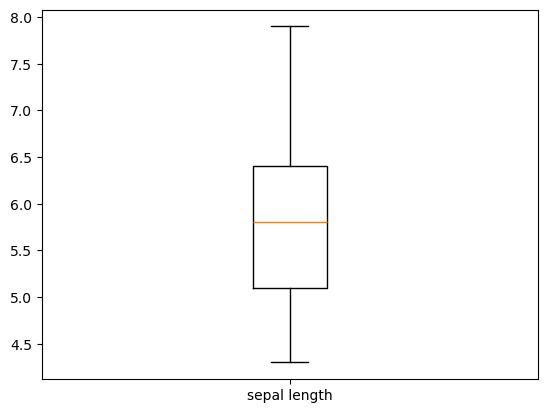

In [24]:
plt.boxplot(df['sepal_length'],showfliers=True,labels=['sepal length'])
plt.show();

위의 박스플롯에서 sepal_length 변수 내에서 이상값을 예상해야 하나요?

위 박스플롯에서는 이상값이 없습니다.

이제 "sepal_width","petal_length", "petal_width" 변수에 대한 상자 플롯을 그릴 차례입니다.

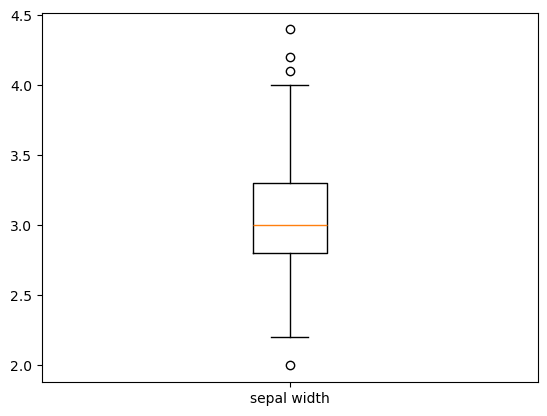

In [28]:
# "sepal_width",변수에 대한 상자 그림 생성
plt.boxplot(df['sepal_width'],showfliers=True, labels=['sepal width'])

# 그래프 출력
plt.show()

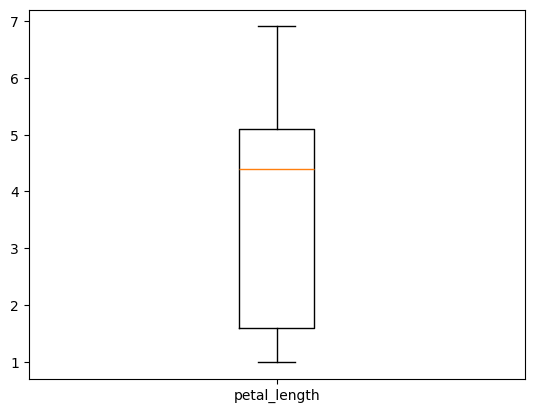

In [29]:
# "petal_length",변수에 대한 상자 그림 생성
plt.boxplot(df['petal_length'],showfliers=True, labels=['petal_length'])

# 그래프 출력
plt.show()

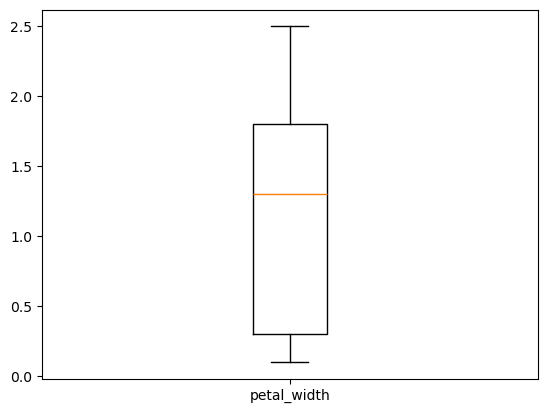

In [30]:
# "petal_width",변수에 대한 상자 그림 생성
plt.boxplot(df['petal_width'],showfliers=True, labels=['petal_width'])

# 그래프 출력
plt.show()

sepal 너비 변수에 잠재적으로 이상치가 있을 수 있다는 사실을 눈치채셨습니까? 또한, 꽃잎 길이와 꽃잎 너비 내 분포가 비뚤어질 수 있다는 점을 확인하셨습니까? 이는 두 경우 모두 중앙값이 상자의 아래쪽보다 상자의 위쪽에 더 가깝기 때문입니다.

<font color=blue>보너스: 하나의 그림에서 동일한 축을 사용하여 4개의 상자 그림을 모두 그릴 수 있습니까? matplotlib 내에서 .subplots() 메서드를 검색하면 도움이 됩니다.</font>

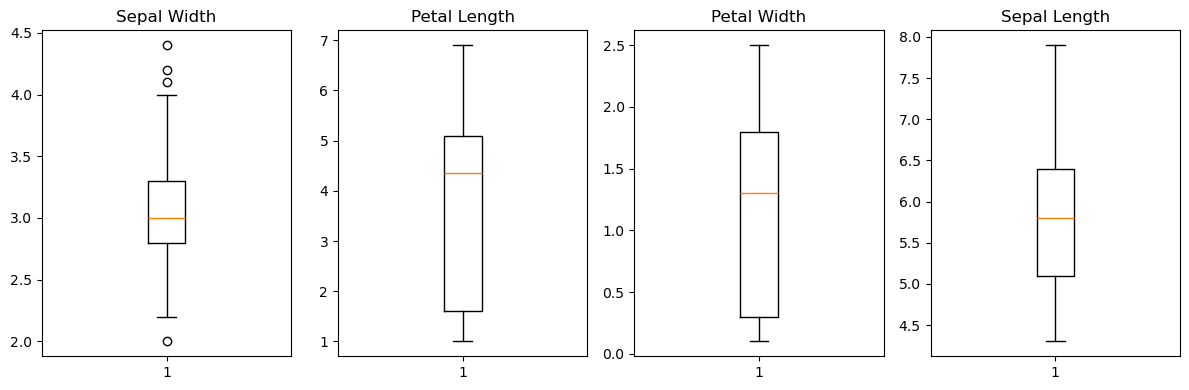

In [75]:
# 1x4의 서브 플롯 생성
figure, axes = plt.subplots(1, 4, figsize=(12, 4))

# 각 변수에 대한 상자 그림 그리기
axes[0].boxplot(df['sepal_width'], showfliers=True)
axes[0].set_title('Sepal Width')

axes[1].boxplot(df['petal_length'], showfliers=True)
axes[1].set_title('Petal Length')

axes[2].boxplot(df['petal_width'], showfliers=True)
axes[2].set_title('Petal Width')

axes[3].boxplot(df['sepal_length'], showfliers=True)
axes[3].set_title('Sepal Length')

# 그래프 출력
plt.tight_layout()
plt.show()


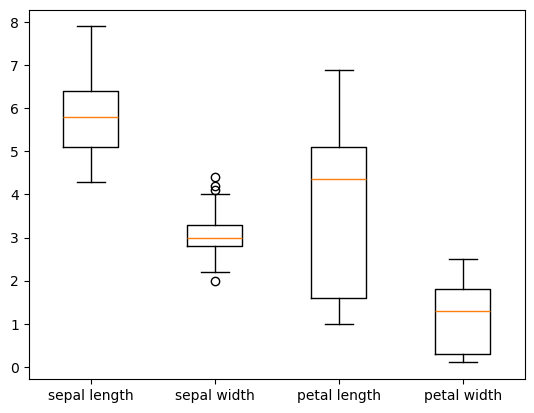

In [99]:
fig, axis = plt.subplots()
axis.boxplot([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']],
             showfliers=True,
             labels=['sepal length', 'sepal width', 'petal length', 'petal width'])
plt.show()


# 3. 히스토그램(histogram)

박스플롯과 마찬가지로 히스토그램도 데이터 분포를 시각화하는 데 도움이 됩니다. 또한 데이터가 높은 값 또는 낮은 값으로 치우쳐 있는지 확인하는 데 도움이 됩니다. 히스토그램 내의 막대는 특정 값 범위에 속하는 데이터 포인트의 수를 나타냅니다. 꽃받침 길이 값에 대한 히스토그램을 확인하려면 아래 코드를 실행해보세요. 빈 값은 데이터의 분할된 수를 나타내고 범위는 x축의 최소값과 최대값을 나타냅니다.

min =  2.0
max =  4.4


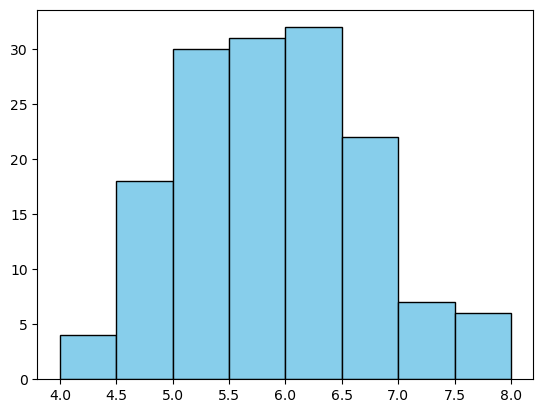

In [91]:
# plt.hist(df['sepal_length'], bins=10, color='skyblue', edgecolor='black')
plt.hist(df['sepal_length'], bins=8, range = (4,8), color='skyblue', edgecolor='black')
plt.show

print('min = ', df['sepal_width'].min())
print('max = ', df['sepal_width'].max())

위의 히스토그램에서 분포가 4.5와 7.0 사이에 속하는 대부분의 데이터로 비교적 균형을 이루고 있음을 알 수 있습니다. 이제 나머지 변수에 대한 히스토그램을 그려보십시오. 여러 빈과 범위 값을 사용하여 간격이 좋은 빈을 찾아보세요. 예를 들어, 1, 0.5, 0,2 등의 간격을 갖는 빈은 시각화하기가 더 쉽습니다. 도움이 되도록 최소값과 최대값을 출력할 수 있습니다. 예를 들어, 꽃받침 길이의 최소값과 최대값은 다음 코드를 실행하면 출력됩니다. 값의 범위는 4에서 8 사이이며 간격이 0.5이므로 시각화하기 쉬운 8개의 빈이 적합하다는 것을 알 수 있습니다.

min =  0.1
max =  2.5


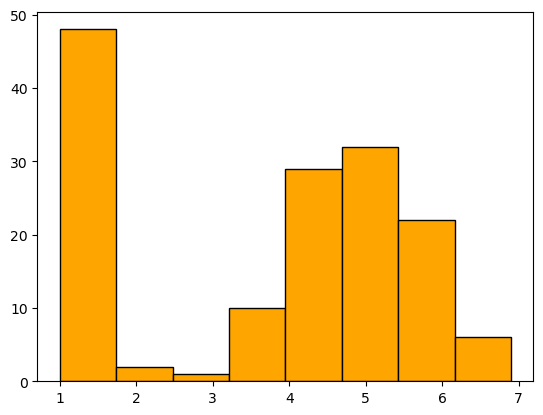

In [92]:
plt.hist(df['petal_length'], bins=8, color='orange', edgecolor='black')
plt.show

print('min = ', df['petal_width'].min())
print('max = ', df['petal_width'].max())

아래에서 나머지 히스토그램을 그릴 수 있습니다! 각 히스토그램에 사용된 빈의 범위와 수를 기록합니다. 범위 값과 수를 어떻게 찾을 수 있을까요? 박스플롯과 비교하여 히스토그램에서 얻을 수 있는 정보는 무엇입니까?

히스토그램은 특정 값 범위(예: 0과 1 사이)에 대한 개수를 제공할 수 있는 반면 박스플롯은 백분위수 범위를 사용하여 분포에 대한 정보를 제공합니다.

min =  2.0
max =  4.4


<function matplotlib.pyplot.show(close=None, block=None)>

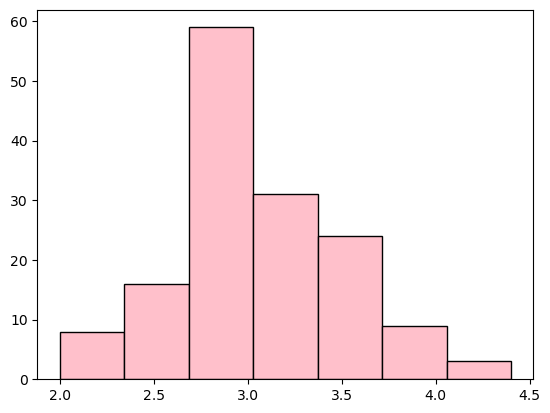

In [90]:
print('min = ', df['sepal_width'].min())
print('max = ', df['sepal_width'].max())

plt.hist(df['sepal_width'], bins=7, color='pink', edgecolor='black')
plt.show

min =  0.1
max =  2.5


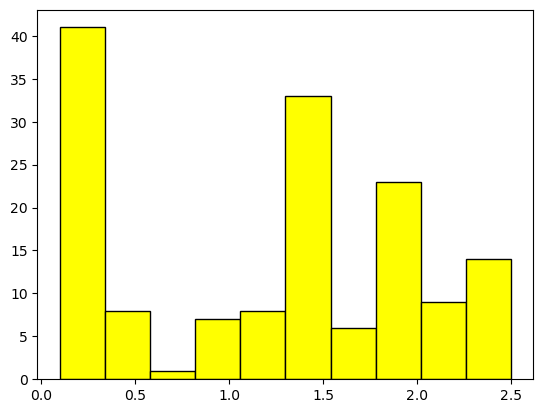

In [93]:
plt.hist(df['petal_width'], bins=10, color='yellow', edgecolor='black')
plt.show

print('min = ', df['petal_width'].min())
print('max = ', df['petal_width'].max())

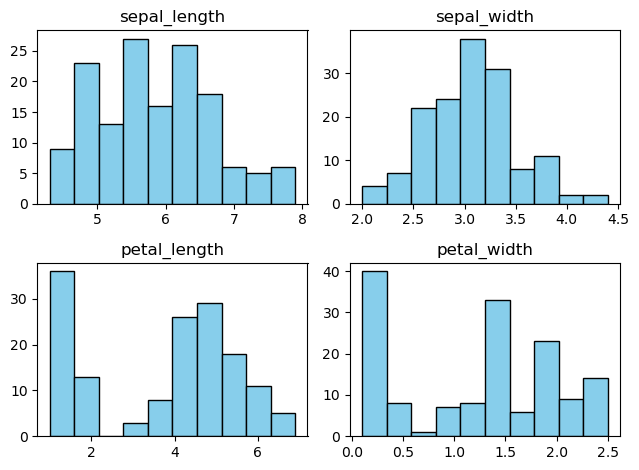

In [64]:
fig, axs = plt.subplots(2, 2)
for column,x,y in zip(df.columns,(0,0,1,1),(0,1,0,1)):
    axs[x,y].hist(df[column], bins=10, color='skyblue', edgecolor='black')  # bins는 막대의 갯수를 의미합니다.
    axs[x,y].set_title(column)
plt.tight_layout()
plt.show()

위의 히스토그램에서 꽃잎 길이와 꽃잎 너비 모두에 대해 분포가 치우친 것을 관찰할 수 있어야 합니다. 이것은 이전에 박스플롯에서 본 것과 동일한 결과입니다.

# 4. 산점도(Scatter Plots)

박스플롯과 히스토그램 모두 단일 변수 내에 이상치가 존재하는지 식별할 수 있습니다. 1개의 변수가 아닌 2개의 변수에서 이상값을 찾아야 하는 경우 어떻게 해야 할까요? 산점도를 사용하여 확인할 수 있습니다. 산점도는 2개의 변수에 대해 점을 표시하여 이상값이 있는지 식별할 수 있습니다. 아래 코드를 실행해 보십시오. 코드는 "꽃잎 길이"와 "꽃잎 너비"를 변수로 사용합니다.

Text(0, 0.5, 'petal_width')

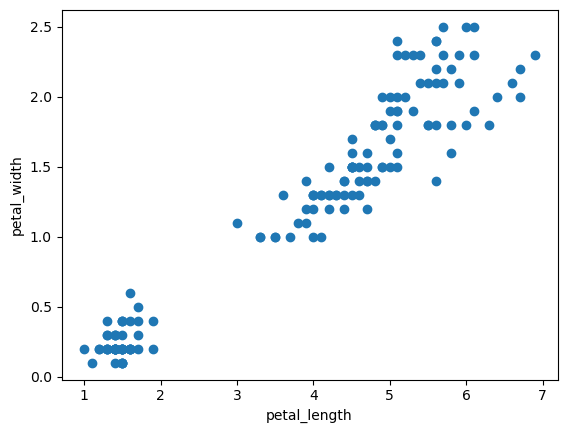

In [94]:
plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

산점도에 이상치를 확인할 수 있습니까? 플롯에서 이상치는 어디에 있습니까?

#your answer here

위의 그림에서 플롯의 왼쪽 아래에 이상치가 있는 것처럼 보일 수 있습니다. 이러한 점이 다수의 점에서 매우 멀리 떨어져 있기 때문입니다. 그러나 이상치는 일반적으로 함께 클러스터되지 않으므로 이상치는 아닙니다. 일반적으로 이상치는 소수만 존재합니다. 왼쪽 아래의 점들은 이상값이 아니라 클러스터인 것 같습니다. 이 클러스터가 있는 이유는 나중에 노트북에서 살펴보겠습니다. 또한 유심히 관찰하면 꽃잎 너비와 꽃잎 길이 사이에 직접적인 관계가 있는 것처럼 보이는 것도 알 수 있습니다. 즉, 꽃잎 너비 값이 낮으면 꽃잎 길이 값도 낮아지고, 그 반대의 경우도 마찬가지입니다. 따라서 산점도는 때때로 변수 간의 관계도 나타낼 수 있습니다.

Now it is your turn to try and plot a scatter plot. Use the remaining 2 variables, "sepal length" and "sepal width", to plot the scatter plot. Spend some time to study the plot. Do you see any interesting relationship between the two variables?
나머지 변수에 대해서도 산점도를 그려봅시다. 나머지 2개의 변수 "꽃받침 길이" 및 "꽃받침 너비"를 사용하여 산점도를 그려봅니다. 플롯을 확인하고 연구해 보세요. 두 변수 사이에 흥미로운 관계가 있습니까?

Text(0, 0.5, 'sepal_width')

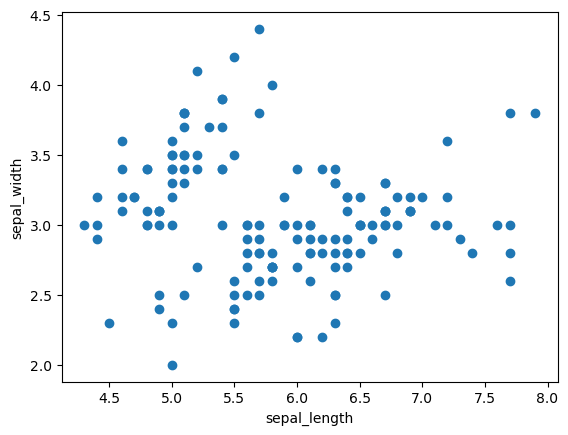

In [95]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

꽃받침 너비와 꽃받침 길이를 비교할 때 뚜렷한 이상값이 없는 것으로 플롯에서 관찰할 수 있습니다. 또한 꽃받침 너비와 꽃받침 길이 사이에는 명확한 관계가 없는 것으로 보입니다.

<font color=blue>보너스: 산점도를 사용하여 데이터 세트의 클래스 차이를 이해할 수 있습니다. 앞서 우리는 꽃의 클래스를 사용하지 않았습니다. 클래스는 각 꽃의 레이블입니다. 이것은 "꽃받침 길이", "꽃받침 너비", "꽃잎 길이" 및 "꽃잎 너비" 값을 사용하여 꽃 종류를 예측해볼 수 있음을 의미합니다. 산점도를 사용하여 클래스를 예측하는 데 가장 유용한 변수를 확인할 수 있습니다. 아래 코드를 실행해보세요!
</font>

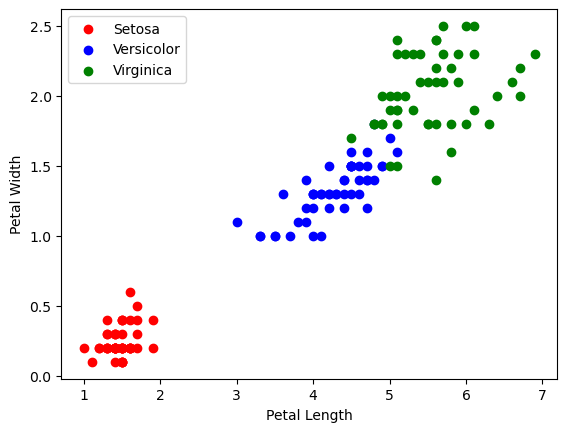

In [97]:
# 데이터 프레임을 3개의 클래스로 분할
df_Setosa = df[df['class'] == 'Iris-setosa']
df_Versicolor = df[df['class'] == 'Iris-versicolor']
df_Virginica = df[df['class'] == 'Iris-virginica']

# 다른 컬러를 이용하여 클래스를 구분합니다. c=색상 제어, label=범례에 표시된 이름 제어 
plt.scatter(df_Setosa['petal_length'],df_Setosa['petal_width'],c='red',label='Setosa')
plt.scatter(df_Versicolor['petal_length'],df_Versicolor['petal_width'],c='blue',label='Versicolor')
plt.scatter(df_Virginica['petal_length'],df_Virginica['petal_width'],c='green',label='Virginica')

# 축 및 범례 추가
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

위 그래프는 우리가 꽃의 종류를 예측하고 싶다면 꽃잎 너비와 꽃잎 길이가 중요한 변수가 될 수 있음을 보여줍니다. 또한 앞서 살펴 보았던 왼쪽 모서리의 값이 이상값이 아닌 이유를 설명해 줍니다. 다른 변수에 대해서도 동일한 플롯을 그려볼 수 있습니다. 클래스를 구분하는게 쉬운가요?

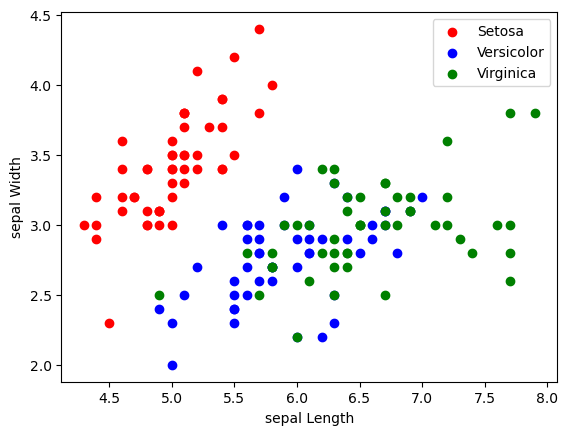

In [98]:
# 데이터 프레임을 3개의 클래스로 분할
df_Setosa = df[df['class'] == 'Iris-setosa']
df_Versicolor = df[df['class'] == 'Iris-versicolor']
df_Virginica = df[df['class'] == 'Iris-virginica']

# 다른 컬러를 이용하여 클래스를 구분합니다. c=색상 제어, label=범례에 표시된 이름 제어 
plt.scatter(df_Setosa['sepal_length'],df_Setosa['sepal_width'],c='red',label='Setosa')
plt.scatter(df_Versicolor['sepal_length'],df_Versicolor['sepal_width'],c='blue',label='Versicolor')
plt.scatter(df_Virginica['sepal_length'],df_Virginica['sepal_width'],c='green',label='Virginica')

# 축 및 범례 추가
plt.legend()
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')

plt.show()

두 그래프에서 확인할 수 있듯이 데이터 포인트를 다른 두 클래스와 쉽게 분리할 수 있으므로, setosa 클래스를 가장 쉽게 구분할 수 있습니다.